# Foundation of Data Analysis - WS24

## Lab Assignment - Supervised Learning (Template)

**Due date: 9:45am on 11.12.2024**

This jupyter notebook serves as a template for the supervised lab assignment for you to work in. Please consult the exam sheet (supervised_lab_ws24.pdf) that you can find on Moodle for all the tasks as well as rules and regulations pertaining the assignment. Most importantly, you are only allowed to use the libraries/functions imported in the first code cell (for some tasks you are limited to fewer libraries - please see the instructions). The comments atop each cell are reminders of the tasks but do not replace the instructions in the pdf (the latter is binding).

Do not hesitate to email me (XXX) at XX.XX@univie.ac.at or post on the discussion forum on Moodle with any questions you may have.

Do not forget to set random seeds for reproducibility whenever necessary. Good luck!

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, zero_one_loss, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

## 1) Cross Validation for Random Forests

> Start time: 16.30

In [2]:
# 1.0 Load the data
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [3]:
# 1.1 Print first ten rows
print(train.head(10))

         X1        X2  Y
0  0.942786  2.513357  0
1  0.001826 -0.171908  1
2 -0.225599 -1.572651  1
3  0.551667 -0.279003  1
4  0.789346  2.178841  0
5  0.697576 -0.435335  0
6  0.787238  1.960758  0
7  1.226155  0.932646  0
8 -0.177914  0.668113  1
9  0.740864  0.516436  0


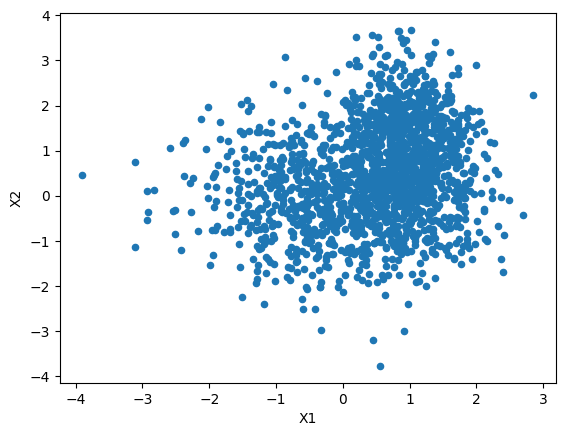

In [9]:
# 1.2 Target value evenly distributed?
train.plot.scatter(x = "X1", y = "X2")
plt.show()

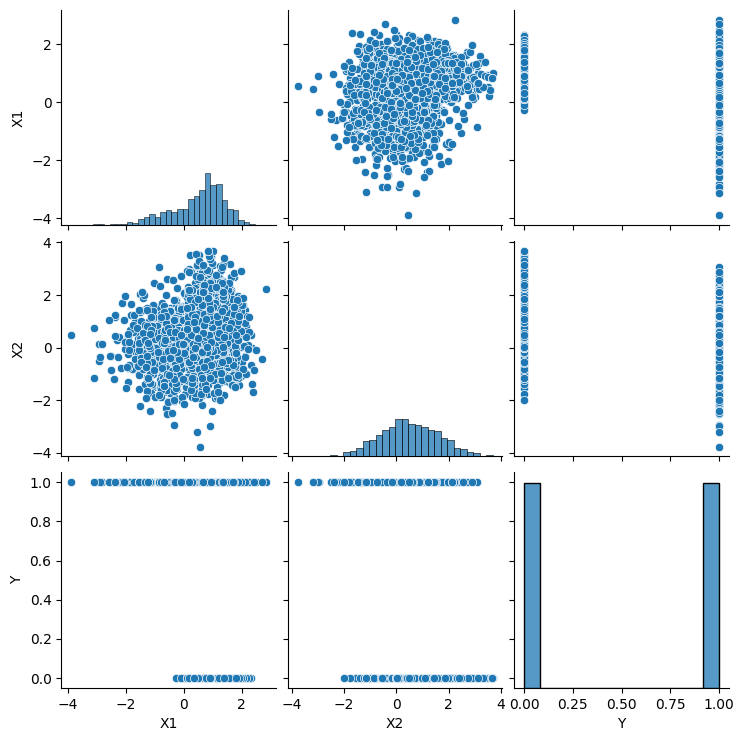

In [8]:
# 1.3 Pairplot
sns.pairplot(train)
plt.show()

In [75]:
# 1.4 Perform random forest
#print(train[['X1', 'X2']].head(10))
#print(train['Y'].head(10))
x_train = train[['X1', 'X2']].head(500)
y_train = train['Y'].head(500)

random_forest = sklearn.ensemble.RandomForestClassifier(random_state=0)
random_forest.fit(x_train, y_train)

x_test = test[['X1', 'X2']]
y_test = test['Y']

y_pred = random_forest.predict(x_test)

train_accu = random_forest.score(x_train, y_train)
test_accu = random_forest.score(x_test, y_test)

print("Training accuracy: ", train_accu)
print("Test accurayc: ", test_accu)


Training accuracy:  1.0
Test accurayc:  0.815


[[89 12]
 [25 74]]


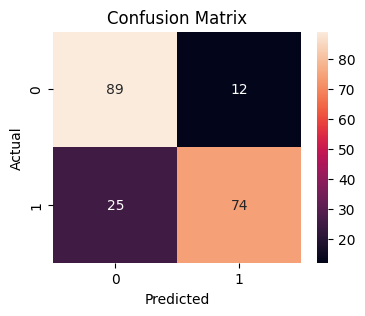

In [77]:
# 1.5 Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [85]:
# 1.6 0-1 loss from the confusion matrix

# model risk -> classification error rate, ie probabilitz of a false prediction
def model_risk(c_matrix):
    total_preds = 0
    false_preds = 0
    # could skip this, as its known test data is capped n=200
    for i in c_matrix:
        for j in i:
            total_preds += j
    false_preds += c_matrix[0][1]
    false_preds += c_matrix[1][0]
    return float(false_preds/total_preds)

calculated_risk = model_risk(conf_matrix)
print("Risk from subtask4: ", calculated_risk)


Risk from subtask4:  0.185


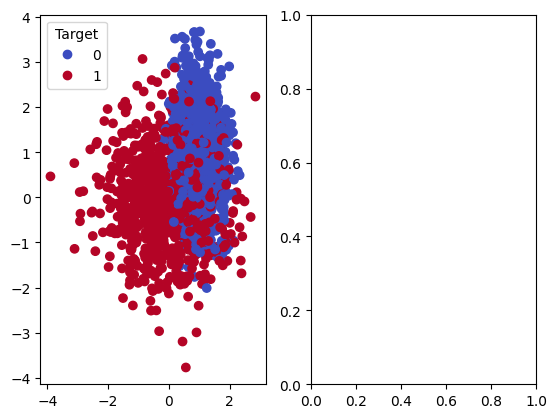

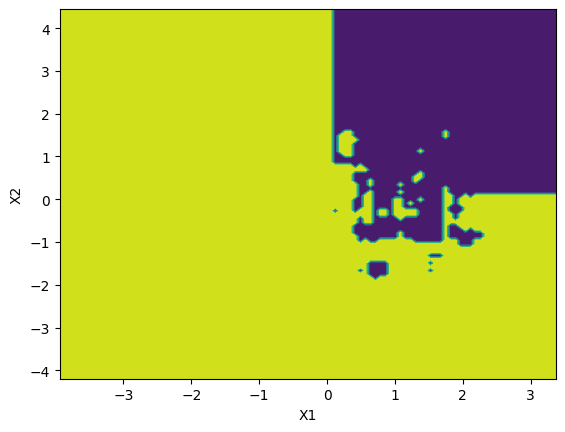

In [111]:
# 1.7 Scatter and decision regions
fig, (scatter_plt, decision_plt) = plt.subplots(1, 2)
scatter_plt.scatter(train['X1'], train['X2'], c=train['Y'], cmap='coolwarm')
scatter_plt.legend(*scatter.legend_elements(), title='Target')
decision_plt = DecisionBoundaryDisplay.from_estimator(random_forest, x_train, response_method="predict")

In [ ]:
# 1.8 Learning Curve


In [ ]:
# 1.9 Explain problem


In [ ]:
# 1.10 Cross validation


In [ ]:
# 1.11 Train best


In [ ]:
# 1.12 Compare avg nodes and depth


In [ ]:
# 1.13 Comparison of model performance


In [ ]:
# 1.14 Pruning


## 2) On Linear Separability

In [ ]:
# 2.0 Load data
df1 = pd.read_csv("data_xor.csv")
df2 = pd.read_csv("data_sphere.csv")

In [ ]:
# 2.1 Scatter plots


In [ ]:
# 2.2 Logistic Regressions


In [ ]:
# 2.3 Interpret


In [ ]:
# 2.4 Classify data_xor


In [ ]:
# 2.5 Classify sphere


In [ ]:
# 2.6 Explanation of what was done


In [ ]:
# 2.7 Kernel trick and kernel svm


In [ ]:
# 2.8 KernelSVM
